# Exploring pangolin's mutation annotated tree

In [1]:
import os
from collections import defaultdict
from matplotlib import pyplot as plt
from Bio.Phylo.NewickIO import Parser
from pyrocov.align import PANGOLEARN_DATA
from pyrocov.external.usher import parsimony_pb2
from pyrocov.usher import Mutation, NUCLEOTIDE, refine_mutation_tree

In [2]:
with open(os.path.join(PANGOLEARN_DATA, "lineageTree.pb"), "rb") as f:
    proto = parsimony_pb2.data.FromString(f.read())

In [3]:
lineages = sorted(set(m.clade for m in proto.metadata if m.clade))
"B.1.1.529" in lineages

False

In [4]:
def plot_mutation_histogram(proto):
    tree = next(Parser.from_string(proto.newick).parse())
    clades = list(tree.find_clades())
    assert len(proto.metadata) == len(clades)
    assert len(proto.node_mutations) == len(clades)
    clade_to_muts = defaultdict(dict)
    for clade, muts in zip(clades, proto.node_mutations):
        for mut in muts.mutation:
            clade_to_muts[clade][mut.position] = Mutation(
                mut.position,
                NUCLEOTIDE[mut.ref_nuc],
                "".join(NUCLEOTIDE[n] for n in mut.mut_nuc),
            )
        for c in clade.clades:
            clade_to_muts[c].update(clade_to_muts[clade])
    plt.hist([len(m.mutation) for m in proto.node_mutations], bins=range(21))
    plt.yscale("log")

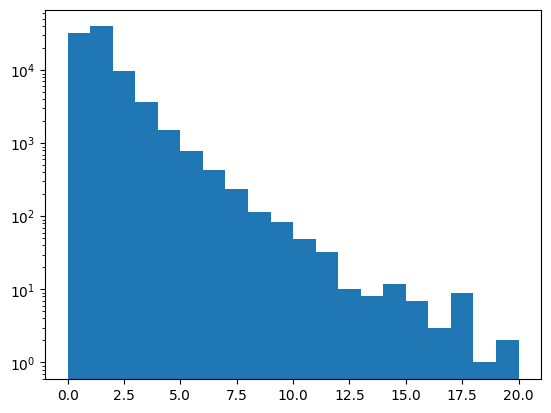

In [5]:
plot_mutation_histogram(proto)

## After pruning

In [6]:
max_num_clades = 10000
with open(f"results/lineageTree.{max_num_clades}.pb", "rb") as f:
    proto = parsimony_pb2.data.FromString(f.read())

In [7]:
sum(1 for m in proto.metadata if m.clade)

10000

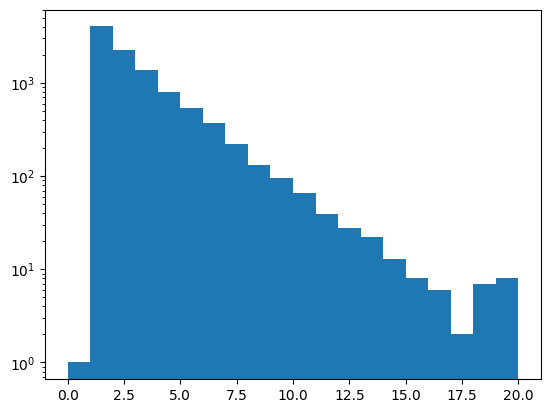

In [8]:
plot_mutation_histogram(proto)